# Load data

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import keras 
# Assign data directory and create categories from the folder names
DATADIR = r"C:\Users\Chris\Desktop\flowers"
CATEGORIES = ["daisy","dandelion","rose","sunflower","tulip"]

#Display first image of data
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)    
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    print(category)    
    break

Using TensorFlow backend.


<Figure size 640x480 with 1 Axes>

daisy


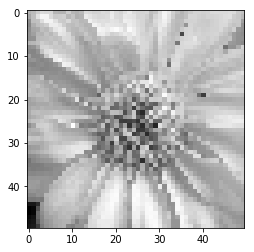

(50, 50)


In [5]:
# Resize images
IMG_SIZE = 50

resize = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(resize, cmap='gray')
plt.show()
print(resize.shape)

In [6]:
# Initialise training data array
training_data = []

# Iterate through folders and resize each image
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

create_training_data();

In [7]:
# Size of data
print(len(training_data))

4323


In [8]:
# Shuffle data
import random
random.shuffle(training_data)

In [9]:
# Initialise feature and label arrays 
X = []
y = []

In [10]:
# Iterate over the data and separate the features and labels
for features,label in training_data:
    X.append(features);
    y.append(label);

In [11]:
# Reshape data 
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [12]:
# Normalize features 
X = X / 255;

In [13]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot arrays
y = keras.utils.to_categorical(y, num_classes=5)
y.shape

(4323, 5)

In [14]:
# Split training data for testing purposes
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

# Model

In [30]:
# Adjustable settings

# Batch size
BATCH = 32

# Size of each convolution
CONV_SIZE = (3,3)

# Size of pooling
POOL_SIZE = (2,2)

# Number of epochs
EPOCHS = 100

#Dropout Rate
DROPOUT = 0.5

In [31]:
# Convolutional Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import TensorBoard
import time

dense_layers = [0]#[0, 1, 2]
layer_sizes = [32, 64, 128]#, 256]
conv_layers = [3]#[1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "E-{}-{}-conv-{}-nodes-{}-dense-DROP-{}-{}".format(EPOCHS, conv_layer, layer_size, dense_layer, DROPOUT, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size,CONV_SIZE, input_shape=x_train.shape[1:]))
            model.add(Activation("relu"))
            model.add(MaxPooling2D(pool_size=POOL_SIZE))
            
            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size,CONV_SIZE))
                model.add(Activation("relu"))
                model.add(MaxPooling2D(pool_size=POOL_SIZE))

            model.add(Flatten()) #Convert 3D inputs to 1D vectors
            
            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation("relu"))
            
            #Dropout layer
            model.add(Dropout(DROPOUT))
            
            #Output layer
            model.add(Dense(5))
            model.add(Activation('softmax')) 

            tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

            model.compile(loss="categorical_crossentropy",
                         optimizer="adam",
                         metrics=['accuracy'])

            fit = model.fit(x_train,
                      y_train, 
                      batch_size=BATCH, 
                      shuffle=True, 
                      epochs=EPOCHS, 
                      validation_split=0.1,
                      verbose=2, callbacks=[tensorboard])


E-100-3-conv-32-nodes-0-dense-DROP-0.5-1536100007
Train on 3501 samples, validate on 389 samples
Epoch 1/100
 - 170s - loss: 1.6013 - acc: 0.2414 - val_loss: 1.5807 - val_acc: 0.2725
Epoch 2/100
 - 171s - loss: 1.5517 - acc: 0.2928 - val_loss: 1.4818 - val_acc: 0.3625
Epoch 3/100
 - 170s - loss: 1.4941 - acc: 0.3439 - val_loss: 1.4298 - val_acc: 0.4242
Epoch 4/100
 - 170s - loss: 1.4693 - acc: 0.3616 - val_loss: 1.4016 - val_acc: 0.4422
Epoch 5/100
 - 171s - loss: 1.4335 - acc: 0.3939 - val_loss: 1.4010 - val_acc: 0.4576
Epoch 6/100
 - 171s - loss: 1.4044 - acc: 0.4093 - val_loss: 1.3723 - val_acc: 0.4370
Epoch 7/100
 - 170s - loss: 1.3550 - acc: 0.4373 - val_loss: 1.3220 - val_acc: 0.4807
Epoch 8/100
 - 171s - loss: 1.3216 - acc: 0.4642 - val_loss: 1.3185 - val_acc: 0.4781
Epoch 9/100
 - 171s - loss: 1.2710 - acc: 0.4796 - val_loss: 1.3143 - val_acc: 0.4781
Epoch 10/100
 - 170s - loss: 1.2655 - acc: 0.4873 - val_loss: 1.2628 - val_acc: 0.4910
Epoch 11/100
 - 170s - loss: 1.2403 - acc:

Epoch 95/100
 - 170s - loss: 0.4530 - acc: 0.8372 - val_loss: 1.2774 - val_acc: 0.5578
Epoch 96/100
 - 170s - loss: 0.4657 - acc: 0.8340 - val_loss: 1.3097 - val_acc: 0.5630
Epoch 97/100
 - 169s - loss: 0.4768 - acc: 0.8218 - val_loss: 1.3170 - val_acc: 0.5681
Epoch 98/100
 - 170s - loss: 0.4409 - acc: 0.8352 - val_loss: 1.3166 - val_acc: 0.5656
Epoch 99/100
 - 171s - loss: 0.4370 - acc: 0.8412 - val_loss: 1.3374 - val_acc: 0.5553
Epoch 100/100
 - 170s - loss: 0.4383 - acc: 0.8335 - val_loss: 1.4217 - val_acc: 0.5476
E-100-3-conv-64-nodes-0-dense-DROP-0.5-1536117054
Train on 3501 samples, validate on 389 samples
Epoch 1/100
 - 169s - loss: 1.5995 - acc: 0.2476 - val_loss: 1.5812 - val_acc: 0.3522
Epoch 2/100
 - 169s - loss: 1.5420 - acc: 0.3142 - val_loss: 1.5033 - val_acc: 0.3548
Epoch 3/100
 - 169s - loss: 1.4787 - acc: 0.3619 - val_loss: 1.4056 - val_acc: 0.4499
Epoch 4/100
 - 168s - loss: 1.4178 - acc: 0.3970 - val_loss: 1.3713 - val_acc: 0.4396
Epoch 5/100
 - 169s - loss: 1.3777 -

 - 168s - loss: 0.1920 - acc: 0.9326 - val_loss: 1.6928 - val_acc: 0.5758
Epoch 89/100
 - 169s - loss: 0.1918 - acc: 0.9340 - val_loss: 1.6938 - val_acc: 0.5707
Epoch 90/100
 - 169s - loss: 0.1627 - acc: 0.9417 - val_loss: 1.7128 - val_acc: 0.5604
Epoch 91/100
 - 168s - loss: 0.1691 - acc: 0.9443 - val_loss: 1.6343 - val_acc: 0.5861
Epoch 92/100
 - 169s - loss: 0.1753 - acc: 0.9369 - val_loss: 1.7373 - val_acc: 0.5733
Epoch 93/100
 - 169s - loss: 0.1595 - acc: 0.9474 - val_loss: 1.6818 - val_acc: 0.5578
Epoch 94/100
 - 168s - loss: 0.1579 - acc: 0.9446 - val_loss: 1.7146 - val_acc: 0.5707
Epoch 95/100
 - 168s - loss: 0.1738 - acc: 0.9389 - val_loss: 1.6786 - val_acc: 0.5758
Epoch 96/100
 - 169s - loss: 0.1582 - acc: 0.9443 - val_loss: 1.6286 - val_acc: 0.5733
Epoch 97/100
 - 169s - loss: 0.1640 - acc: 0.9414 - val_loss: 1.5825 - val_acc: 0.5553
Epoch 98/100
 - 170s - loss: 0.1628 - acc: 0.9437 - val_loss: 1.7235 - val_acc: 0.5681
Epoch 99/100
 - 169s - loss: 0.1720 - acc: 0.9426 - val_

Epoch 83/100
 - 94s - loss: 0.1019 - acc: 0.9654 - val_loss: 2.0195 - val_acc: 0.5296
Epoch 84/100
 - 94s - loss: 0.0948 - acc: 0.9700 - val_loss: 2.0417 - val_acc: 0.5681
Epoch 85/100
 - 95s - loss: 0.1062 - acc: 0.9614 - val_loss: 2.0402 - val_acc: 0.5501
Epoch 86/100
 - 95s - loss: 0.1088 - acc: 0.9617 - val_loss: 2.1625 - val_acc: 0.5527
Epoch 87/100
 - 94s - loss: 0.0916 - acc: 0.9712 - val_loss: 2.1605 - val_acc: 0.5450
Epoch 88/100
 - 94s - loss: 0.1089 - acc: 0.9617 - val_loss: 2.0904 - val_acc: 0.5476
Epoch 89/100
 - 94s - loss: 0.1283 - acc: 0.9574 - val_loss: 2.1378 - val_acc: 0.5347
Epoch 90/100
 - 93s - loss: 0.1133 - acc: 0.9640 - val_loss: 2.1307 - val_acc: 0.5476
Epoch 91/100
 - 95s - loss: 0.0923 - acc: 0.9712 - val_loss: 2.2084 - val_acc: 0.5527
Epoch 92/100
 - 94s - loss: 0.1113 - acc: 0.9683 - val_loss: 2.2180 - val_acc: 0.5373
Epoch 93/100
 - 94s - loss: 0.0869 - acc: 0.9709 - val_loss: 2.0989 - val_acc: 0.5424
Epoch 94/100
 - 94s - loss: 0.0805 - acc: 0.9757 - val

In [17]:
# Evaluate Model
model.evaluate(x_test, 
               y_test, 
               batch_size=32, 
               verbose=1 )


433/433 [==============================] - 0s 606us/step


[1.452808421698784, 0.3972286374822225]

In [18]:
# Predict classes using test data
predict = model.predict_classes(x_test, 
                      batch_size=32, 
                      verbose=1)
print(predict)

433/433 [==============================] - 0s 657us/step
[1 1 1 2 1 2 2 4 3 2 1 1 1 1 0 0 1 0 1 1 1 1 0 3 1 2 3 1 1 1 1 3 1 1 2 3 1
 2 4 1 3 3 1 2 4 3 2 1 1 4 1 1 3 4 4 1 1 1 1 1 1 1 1 2 0 4 1 1 1 3 1 1 4 2
 0 1 1 1 2 3 0 2 3 4 2 1 1 2 1 2 1 3 1 2 1 1 1 1 4 2 1 1 4 1 1 4 1 3 1 1 1
 3 1 1 2 1 1 2 3 4 4 1 2 4 3 1 1 0 1 2 1 1 1 1 2 1 4 2 3 1 1 1 1 2 4 4 3 3
 4 1 2 1 2 1 1 4 1 1 1 1 3 0 2 3 1 1 0 1 1 1 1 1 1 1 1 2 1 1 1 0 1 1 1 4 1
 1 1 1 1 1 3 2 1 1 1 3 3 1 1 2 3 1 1 4 2 1 0 2 4 2 1 1 1 2 4 1 1 2 2 3 2 1
 2 3 2 2 1 1 3 4 4 0 1 0 1 0 4 2 1 1 1 1 1 3 1 0 2 2 4 1 4 0 1 2 4 1 1 1 0
 2 3 2 1 2 1 1 1 3 0 4 2 0 1 1 3 1 0 1 4 1 1 1 1 1 3 2 1 0 2 1 4 3 4 4 2 1
 2 0 3 4 0 2 1 3 1 4 1 1 2 2 1 3 1 4 3 1 0 1 1 1 1 2 1 1 0 1 1 0 0 1 2 0 1
 1 2 1 4 2 1 4 1 1 1 0 0 1 1 3 3 1 4 0 1 1 1 4 1 1 3 2 4 1 2 1 3 3 4 4 3 1
 1 1 3 1 1 3 3 0 3 2 1 0 1 1 4 4 1 1 1 1 1 2 1 3 1 2 0 1 1 2 2 1 4 2 3 1 2
 3 1 3 2 2 3 2 3 2 4 1 3 1 4 4 3 1 4 3 1 1 1 2 1 1 2]
